In [1]:
import pandas as pd
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image, display
from glob import glob
from keras.utils import to_categorical
from keras import regularizers
dsize = (80,80)

In [2]:
listofimg = glob('flowers\daisy/*.JPG', recursive=True)
data =[]
for images in listofimg:
    image = cv2.imread (images)
    image1=cv2.resize(image, dsize)
    c=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    data.append(c)
daisy=np.array(data)
daisytrain=daisy[0:613,:]
daisytest=daisy[613:770,:]

In [3]:
listofimg = glob('flowers\dandelion/*.JPG', recursive=True)

data =[]
for images in listofimg:
    image = cv2.imread (images)
    image1=cv2.resize(image, dsize)
    c=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    data.append(c)

dandi=np.array(data)
dandi.shape

danditrain=dandi[0:842,:]
danditest=dandi[842:1053,:]

daisytrain.shape

dandi.shape

(1052, 80, 80)

In [4]:
listofimg = glob('flowers/rose/*.JPG',recursive=True)
data =[]
for images in listofimg:
    image = cv2.imread (images)
    image1=cv2.resize(image, dsize)
    c=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    data.append(c)
rose=np.array(data)
rose.shape
rosetrain=rose[0:628,:]
rosetest=rose[628:785,:]

In [28]:
listofimg = glob('flowers/sunflower/*.JPG',recursive=True)

data =[]

for images in listofimg:
    image = cv2.imread (images)
    image1=cv2.resize(image, dsize)
    c=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    data.append(c)

sun=np.array(data)
sun.shape

suntrain=sun[0:587,:]
suntest=sun[587:735,:]

plt.imshow(suntrain[586]cmap='gray')

SyntaxError: invalid syntax (<ipython-input-28-f48efff55a5c>, line 17)

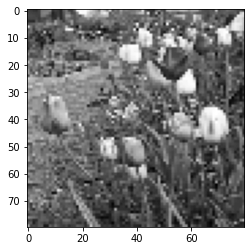

In [27]:
listofimg = glob('flowers/tulip/*.JPG',recursive=True)

data =[]
for images in listofimg:
    image = cv2.imread (images)
    image1=cv2.resize(image, dsize)
    c=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    data.append(c)

tul=np.array(data)
tul.shape

tultrain=tul[0:788,:]
tultest=tul[788:985,:]

pp=tultrain[782]
plt.imshow(pp,cmap='gray')

# Trainlabels

In [7]:
daisylab=np.zeros((daisy.shape[0],1))
dandlab=np.ones((dandi.shape[0],1))
roslab=np.ones((rose.shape[0],1))*2
sunlab=np.ones((sun.shape[0],1))*3
tullab=np.ones((tul.shape[0],1))*4

img_label=np.append(daisylab,dandlab,axis=0)
img_label2=np.append(img_label,roslab,axis=0)
img_label3=np.append(img_label2,sunlab,axis=0)
total_label=np.append(img_label3,tullab,axis=0)
total_label.size

4323

# Append pics

In [8]:
imgt=np.append(daisy,dandi,axis=0)
imgt1=np.append(imgt,rose,axis=0)
imgt2=np.append(imgt1,sun,axis=0)
totalimg=np.append(imgt2,tul,axis=0)
totalimg[0]

array([[139, 147, 150, ..., 160, 153, 154],
       [136, 145, 149, ..., 157, 155, 151],
       [130, 138, 151, ..., 156, 154, 146],
       ...,
       [ 40,  41,  46, ..., 125, 123, 126],
       [ 43,  43,  46, ..., 129, 126, 126],
       [ 44,  45,  48, ..., 132, 129, 127]], dtype=uint8)

# Randomize

In [9]:
np.random.seed(100)
shuf=np.random.randint(0,totalimg.shape[0],totalimg.shape[0]) 
shuf
totalimg=totalimg[shuf]
total_label=total_label[shuf]
one_hot_encode_label_test = to_categorical(total_label)
display(one_hot_encode_label_test)

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

i=120
plt.imshow(totalimg[i])
display(total_label[i])

# Normalize 

In [10]:

train_images = totalimg.reshape((totalimg.shape[0], dsize[0] * dsize[1]))
train_images = train_images.astype('float32') / 255
train_images.max()

1.0

In [11]:
import sklearn.model_selection as model_selection

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_images,one_hot_encode_label_test, train_size=0.60,test_size=0.40)
X_train1, X_val, y_train1, y_val = model_selection.train_test_split(X_train,y_train, train_size=0.8,test_size=0.20)

In [13]:
X_train.shape
X_val.shape

(519, 6400)

In [24]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(100, activation='relu',input_shape=(dsize[0] * dsize[1],)))
network.add(layers.Dense(80, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(80, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(40, activation='relu'))
network.add(layers.Dense(5, activation='softmax'))

In [25]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [26]:
history = network.fit(X_train1,y_train1,epochs=300,batch_size=50,validation_data=(X_val, y_val))

Epoch 1/300
42/42 [==============================] - 1s 32ms/step - loss: 1.7081 - accuracy: 0.2343 - val_loss: 1.5978 - val_accuracy: 0.2929
Epoch 2/300
42/42 [==============================] - 1s 24ms/step - loss: 1.5922 - accuracy: 0.2681 - val_loss: 1.5721 - val_accuracy: 0.2331
Epoch 3/300
42/42 [==============================] - 1s 26ms/step - loss: 1.5465 - accuracy: 0.2965 - val_loss: 1.5799 - val_accuracy: 0.2081
Epoch 4/300
42/42 [==============================] - 1s 26ms/step - loss: 1.5397 - accuracy: 0.3004 - val_loss: 1.6918 - val_accuracy: 0.2620
Epoch 5/300
42/42 [==============================] - 1s 28ms/step - loss: 1.5409 - accuracy: 0.2956 - val_loss: 1.5349 - val_accuracy: 0.3044
Epoch 6/300
42/42 [==============================] - 1s 27ms/step - loss: 1.5126 - accuracy: 0.3139 - val_loss: 1.5331 - val_accuracy: 0.2909
Epoch 7/300
42/42 [==============================] - 1s 31ms/step - loss: 1.5199 - accuracy: 0.3279 - val_loss: 1.5654 - val_accuracy: 0.2524 0s - l

42/42 [==============================] - 1s 25ms/step - loss: 1.0831 - accuracy: 0.5593 - val_loss: 1.8735 - val_accuracy: 0.3276
Epoch 59/300
42/42 [==============================] - ETA: 0s - loss: 1.1075 - accuracy: 0.53 - ETA: 0s - loss: 1.1101 - accuracy: 0.53 - 1s 26ms/step - loss: 1.1101 - accuracy: 0.5338 - val_loss: 1.7995 - val_accuracy: 0.3815
Epoch 60/300
42/42 [==============================] - 1s 25ms/step - loss: 1.1137 - accuracy: 0.5429 - val_loss: 1.8613 - val_accuracy: 0.3642
Epoch 61/300
42/42 [==============================] - 1s 29ms/step - loss: 1.1035 - accuracy: 0.5333 - val_loss: 1.5986 - val_accuracy: 0.3719
Epoch 62/300
42/42 [==============================] - 1s 25ms/step - loss: 1.0879 - accuracy: 0.5492 - val_loss: 2.0437 - val_accuracy: 0.3410
Epoch 63/300
42/42 [==============================] - 1s 25ms/step - loss: 1.1169 - accuracy: 0.5487 - val_loss: 1.8765 - val_accuracy: 0.3391
Epoch 64/300
42/42 [==============================] - 1s 24ms/step - lo

Epoch 115/300
42/42 [==============================] - 1s 24ms/step - loss: 0.8521 - accuracy: 0.6798 - val_loss: 2.1466 - val_accuracy: 0.4162
Epoch 116/300
42/42 [==============================] - 1s 24ms/step - loss: 0.8441 - accuracy: 0.6823 - val_loss: 1.8992 - val_accuracy: 0.4374
Epoch 117/300
42/42 [==============================] - 1s 23ms/step - loss: 0.8364 - accuracy: 0.6905 - val_loss: 1.8921 - val_accuracy: 0.4586
Epoch 118/300
42/42 [==============================] - 1s 24ms/step - loss: 0.8077 - accuracy: 0.6986 - val_loss: 1.7863 - val_accuracy: 0.4239
Epoch 119/300
42/42 [==============================] - 1s 25ms/step - loss: 0.8388 - accuracy: 0.6712 - val_loss: 1.7709 - val_accuracy: 0.3738
Epoch 120/300
42/42 [==============================] - 1s 25ms/step - loss: 0.8121 - accuracy: 0.6900 - val_loss: 2.5528 - val_accuracy: 0.3256
Epoch 121/300
42/42 [==============================] - 1s 25ms/step - loss: 0.7833 - accuracy: 0.6953 - val_loss: 1.9800 - val_accuracy:

42/42 [==============================] - 1s 23ms/step - loss: 0.6385 - accuracy: 0.7633 - val_loss: 2.7567 - val_accuracy: 0.3796- loss: 0.6382 - 
Epoch 172/300
42/42 [==============================] - 1s 23ms/step - loss: 0.6275 - accuracy: 0.7724 - val_loss: 2.1616 - val_accuracy: 0.4470
Epoch 173/300
42/42 [==============================] - 1s 23ms/step - loss: 0.7259 - accuracy: 0.7628 - val_loss: 2.1063 - val_accuracy: 0.4721
Epoch 174/300
42/42 [==============================] - 1s 22ms/step - loss: 0.6496 - accuracy: 0.7681 - val_loss: 2.6838 - val_accuracy: 0.3796
Epoch 175/300
42/42 [==============================] - 1s 23ms/step - loss: 0.5951 - accuracy: 0.7830 - val_loss: 2.3752 - val_accuracy: 0.4143
Epoch 176/300
42/42 [==============================] - 1s 22ms/step - loss: 0.6521 - accuracy: 0.7671 - val_loss: 2.7891 - val_accuracy: 0.3988
Epoch 177/300
42/42 [==============================] - 1s 22ms/step - loss: 0.6644 - accuracy: 0.7695 - val_loss: 2.2246 - val_accura

Epoch 227/300
42/42 [==============================] - 1s 24ms/step - loss: 0.4670 - accuracy: 0.8394 - val_loss: 2.0362 - val_accuracy: 0.3950
Epoch 228/300
42/42 [==============================] - 1s 24ms/step - loss: 0.4671 - accuracy: 0.8500 - val_loss: 2.5603 - val_accuracy: 0.4432
Epoch 229/300
42/42 [==============================] - 1s 27ms/step - loss: 0.5532 - accuracy: 0.8100 - val_loss: 2.3815 - val_accuracy: 0.4586
Epoch 230/300
42/42 [==============================] - 1s 24ms/step - loss: 0.4872 - accuracy: 0.8332 - val_loss: 2.7377 - val_accuracy: 0.4220
Epoch 231/300
42/42 [==============================] - 1s 29ms/step - loss: 0.5554 - accuracy: 0.8158 - val_loss: 2.9261 - val_accuracy: 0.3333
Epoch 232/300
42/42 [==============================] - 1s 30ms/step - loss: 0.5001 - accuracy: 0.8370 - val_loss: 2.2950 - val_accuracy: 0.4316
Epoch 233/300
42/42 [==============================] - 1s 26ms/step - loss: 0.4810 - accuracy: 0.8317 - val_loss: 2.2945 - val_accuracy:

42/42 [==============================] - 2s 45ms/step - loss: 0.4749 - accuracy: 0.8650 - val_loss: 3.3731 - val_accuracy: 0.3931
Epoch 284/300
42/42 [==============================] - 2s 43ms/step - loss: 0.4370 - accuracy: 0.8539 - val_loss: 3.7779 - val_accuracy: 0.3738
Epoch 285/300
42/42 [==============================] - 2s 43ms/step - loss: 0.4428 - accuracy: 0.8611 - val_loss: 2.4718 - val_accuracy: 0.4836
Epoch 286/300
42/42 [==============================] - 2s 55ms/step - loss: 0.4119 - accuracy: 0.8631 - val_loss: 2.6396 - val_accuracy: 0.4027
Epoch 287/300
42/42 [==============================] - 1s 34ms/step - loss: 0.3988 - accuracy: 0.8679 - val_loss: 2.4071 - val_accuracy: 0.4335
Epoch 288/300
42/42 [==============================] - 1s 28ms/step - loss: 0.5880 - accuracy: 0.8394 - val_loss: 3.0365 - val_accuracy: 0.4181
Epoch 289/300
42/42 [==============================] - 1s 28ms/step - loss: 0.4731 - accuracy: 0.8447 - val_loss: 2.1663 - val_accuracy: 0.4605
Epoch 

In [20]:
network.evaluate(X_test,y_test)

55/55 [==============================] - 0s 6ms/step - loss: 4.1052 - accuracy: 0.5393


[4.105212211608887, 0.5393063426017761]

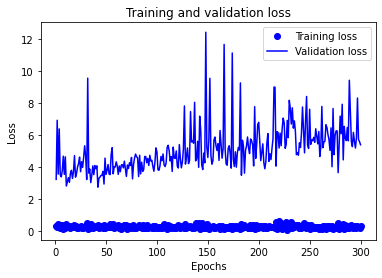

In [23]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 300+ 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()